In [35]:
# import kagglehub

# path = kagglehub.dataset_download("hsankesara/flickr-image-dataset")

# print("Path to dataset files:", path)

In [36]:
import numpy as np
import pandas as pd
import os
from textwrap import wrap

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 12
sns.set_style("dark")

In [37]:
path = "C:/Users/Yakina/.cache/kagglehub/datasets/hsankesara/flickr-image-dataset/versions/1/flickr30k_images/"
import os
os.listdir(path)

['flickr30k_images', 'results.csv']

In [38]:
image_path = path + 'flickr30k_images/'
csv_path = path + 'results.csv'

In [39]:
data = pd.read_csv(csv_path, sep = r'\s*\|\s*')
data.head()

C:\Users\Yakina\AppData\Local\Temp\ipykernel_13500\3933519945.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(csv_path, sep = r'\s*\|\s*')


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,1000092795.jpg,1,"Two young , White males are outside near many ..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [40]:
data['image_name'] = data['image_name'].astype(str)
data['comment_number'] = data['comment_number'].astype(int)
data['comment'] = data['comment'].astype(str)

In [41]:
data.dtypes

image_name        object
comment_number     int64
comment           object
dtype: object

In [42]:
data.isnull().sum()

image_name        0
comment_number    0
comment           0
dtype: int64

In [43]:
def readImage(path, img_size = 224):
    img = load_img(path, color_mode = 'rgb', target_size = (img_size, img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20, 20))
    n = 0
    for i in range(15):
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(image_path + temp_df.image_name[i])
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.comment[i], 20)))
        plt.axis("off")

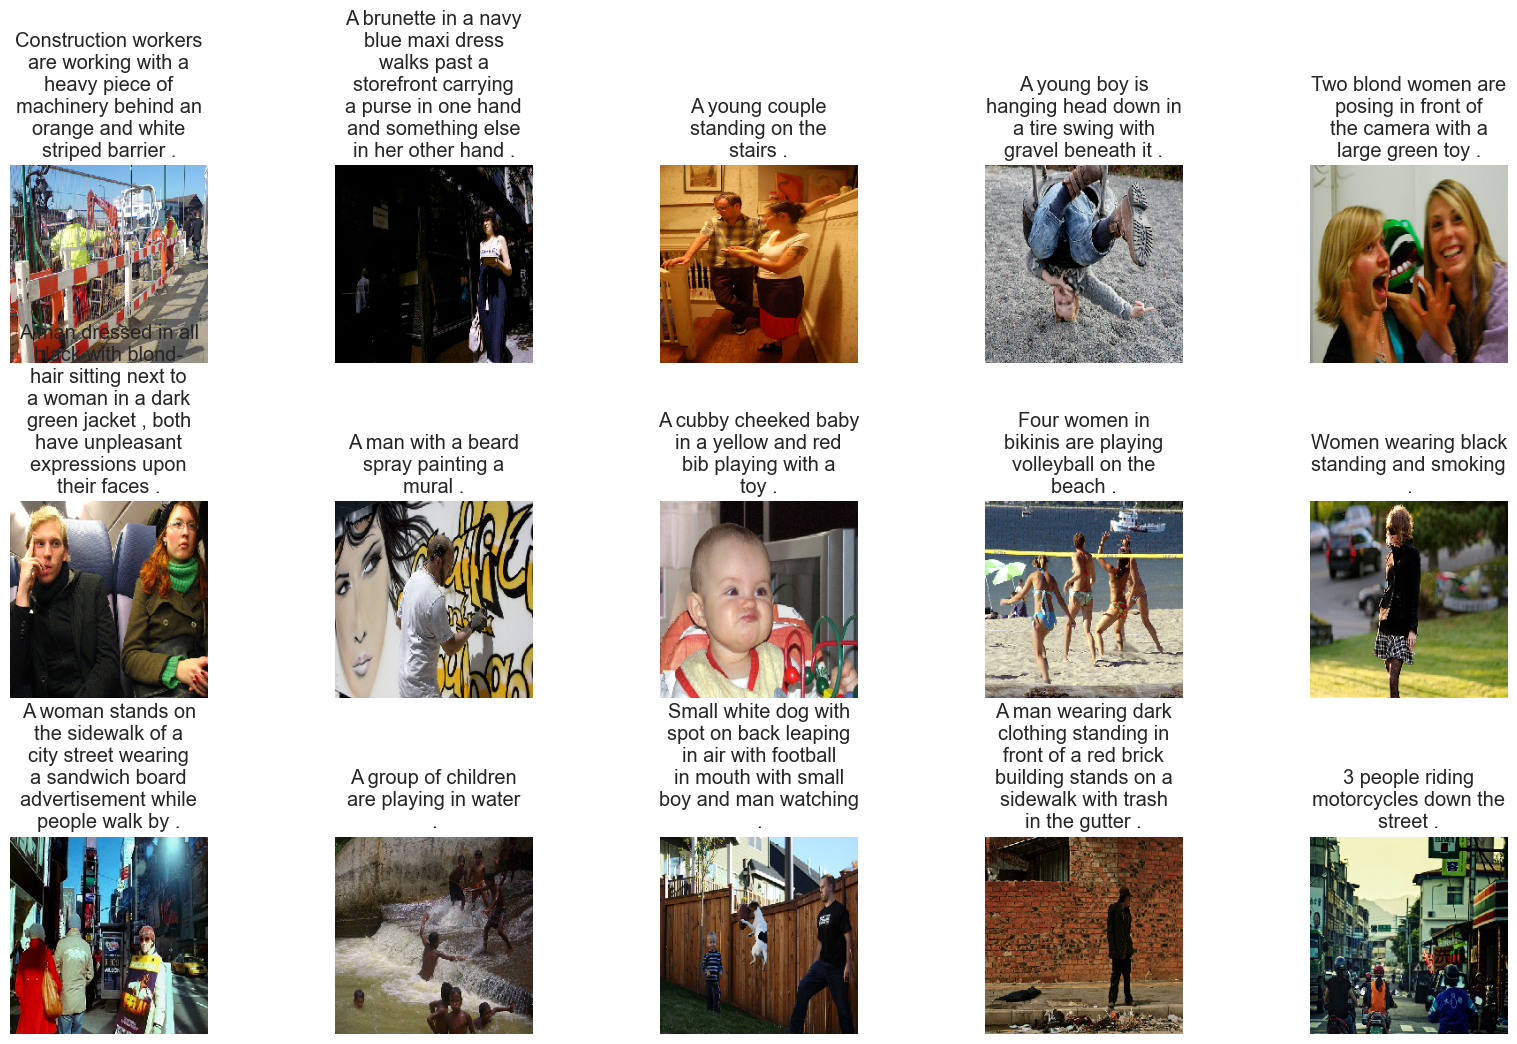

In [44]:
display_images(data.sample(15))

In [45]:
model_file = 'models/model_epoch_2.h5'

In [46]:
caption_model = load_model(model_file)

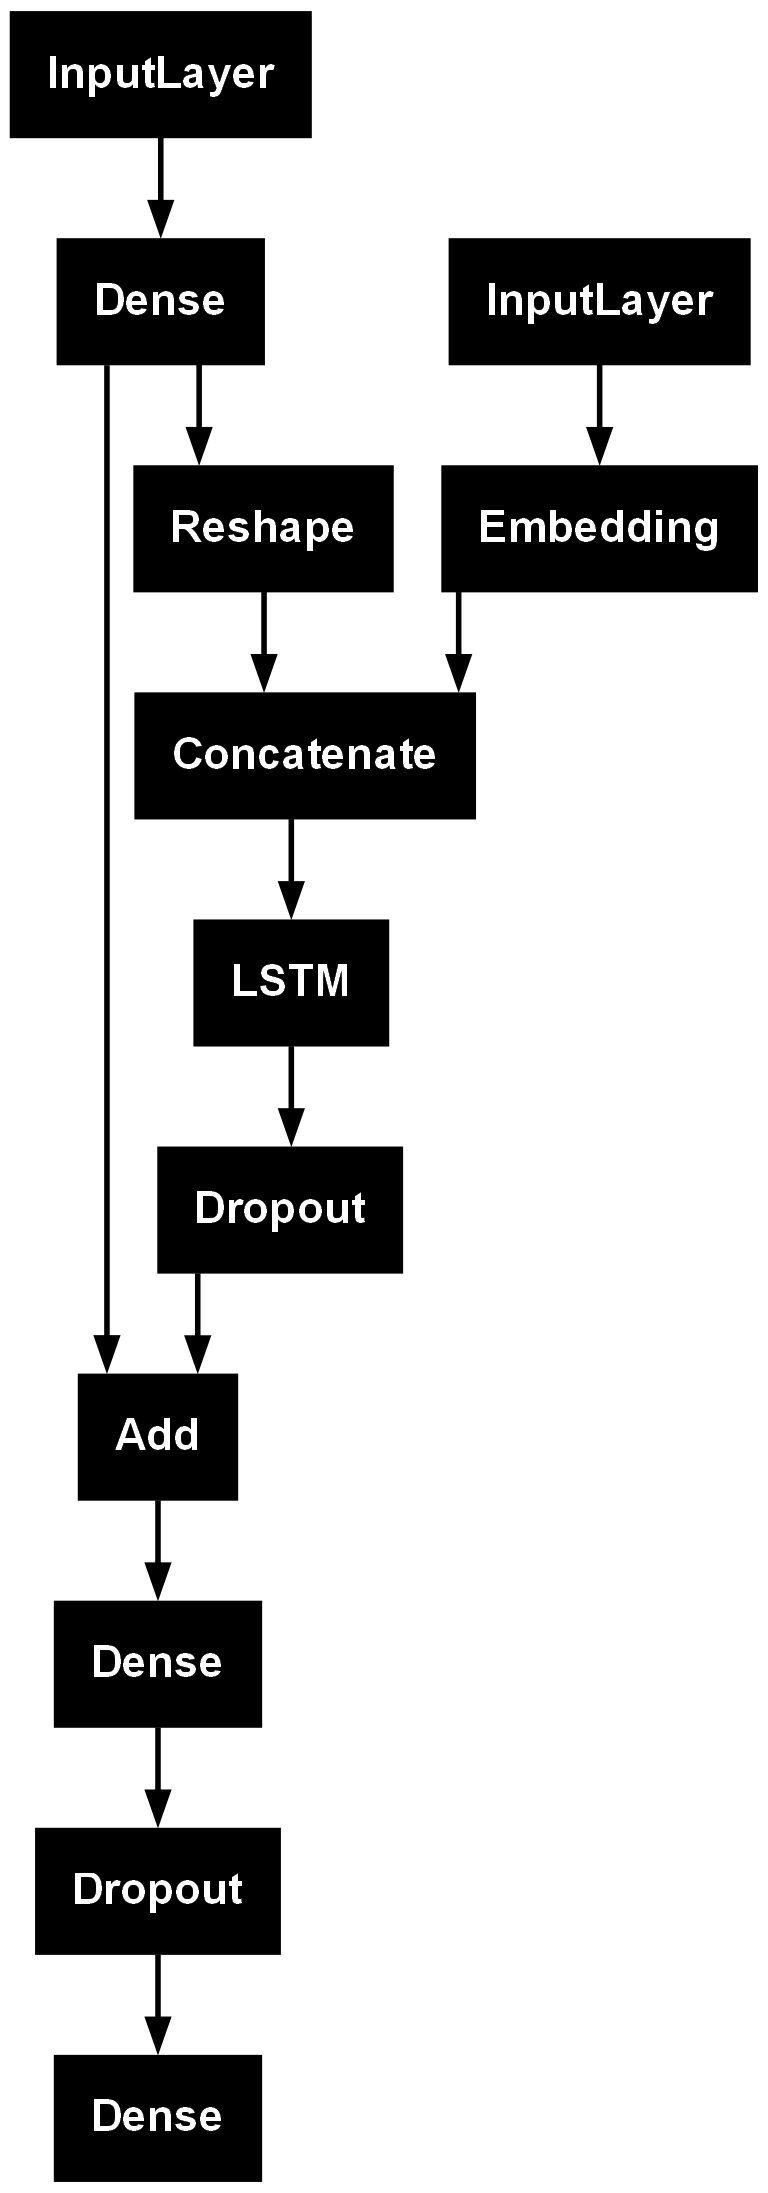

In [47]:
plot_model(caption_model)

In [48]:
caption_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1920)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    491,776 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 74)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 74, 256)   │  4,688,128 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 75, 256)   │          0 │ reshape[0][0],    │
│ (Concatenate)       │                   │            │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dropout[0][0],    │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 18313)     │  2,362,377 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,100,491 (30.90 MB)

 Trainable params: 8,100,489 (30.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)